In [1]:
import matplotlib
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
from training.config_training import config 
from preprocessing.step1 import *
from preprocessing.full_prep import lumTrans
from layers import nms,iou

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
# img = np.load('/work/DataBowl3/stage2/preprocess_1/d7850f462f15f4e8a21bf883450a505c_clean.npy')
# 
# patient_id = '0015ceb851d7251b8f399e39779d1e7d'
patient_id = '0030a160d58723ff36d73f41b170ec21'
img = np.load('F:\\LargeFiles\\lfz\\prep_result\\'+ patient_id +'_clean.npy')
pbb = np.load('F:\\LargeFiles\\lfz\\prep_result\\'+ patient_id +'_pbb.npy')

## Prototype - check values

img shape : (batch_size, z, y, x)

In [3]:
img.shape

(1, 310, 216, 280)

pbb shape: (number_of_bb, 5)

where 5 numbers are (prob, z, y, x, r)

In [4]:
pbb.shape

(141, 5)

In [5]:
pbb[0]

array([-7.69664943e-02,  2.95728961e+01,  1.41731082e+02,  9.76513909e+01,
        1.14115401e+01])

## Probabilities threshold

In [6]:
pbb = pbb[pbb[:,0]>-1]

In [7]:
pbb.shape

(72, 5)

## NMS : Non-max suppression
Remove overlapping boxes.

In [8]:
pbb = nms(pbb,0.05)
box = pbb[0].astype('int')[1:]

In [9]:
pbb.shape

(8, 5)

### box
```
0: z
1: y
2: x
3: r
```

In [10]:
box

array([137,  53,  56,  11])

In [12]:
img.shape

(1, 310, 216, 280)

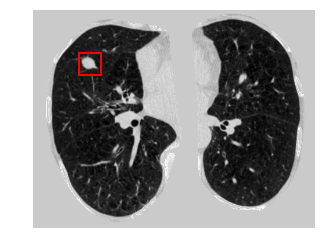

In [11]:
ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]],'gray') # slice by z axis of the box - box[0].
plt.axis('off')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)


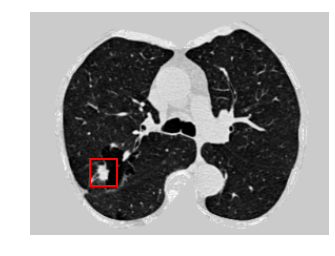

In [42]:
ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]],'gray')
plt.axis('off')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)


In [13]:
a = b'059d8c14b2256a2ba4e38ac511700203'

In [16]:
type(a) is bytes

True

In [17]:
a.decode()

'059d8c14b2256a2ba4e38ac511700203'